# set-up

In [1]:
#import functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
from scipy.stats import hypergeom
from matplotlib_venn import venn2 
import os
import ndex2
import networkx as nx
from netcoloc import netprop_zscore
from netcoloc import netprop
from netcoloc import network_colocalization
from rca_functions import *

In [2]:
os.chdir('/tscc/nfs/home/bsleger/bsl/rare_common_alcohol/')

In [4]:
#define variables
if os.path.isfile('environ_ndex_meta.py'):
    print ('file found')
    from environ_ndex_meta import *
else:
    print('file not found')
    ndex_user=None
    ndex_password=None

interactome_name='pcnet_v20'

file found


In [74]:
#read in network chosen above
analysis_dataset='ACN2'
ACN2 = ndex2.create_nice_cx_from_server(server='public.ndexbio.org',
                                        username=ndex_user,password=ndex_password, 
                                        uuid=UUDIs[analysis_dataset])
ACN2_nodes=list(nx.get_node_attributes(ACN2, 'n').values())

In [75]:
#read in network chosen above
analysis_dataset='UKBB_PCNET2'
UKBB2 = ndex2.create_nice_cx_from_server(server='public.ndexbio.org',
                                        username=ndex_user,password=ndex_password, 
                                        uuid=UUIDs[analysis_dataset])
UKBB2_nodes=list(nx.get_node_attributes(UKBB2, 'n').values())

In [76]:
common_datasets=pd.read_csv('common_datasets.csv',sep=',')
rare_datasets=pd.read_csv('rare_datasets.csv',sep=',')

In [10]:
interactome_name

'pcnet_v20'

In [11]:
r=28
ukbb_seed=import_seedgenes(common_datasets['seed_path'][r],
                 common_datasets['seed_p'][r],
                 common_datasets['seed_gene_name'][r],
                 common_datasets['delim'][r],
                           'bonferroni'
                )
if interactome_name=='pcnet_v14':
    zscore_rare_df=pd.read_csv(rare_datasets['zscore_path'][r].lower(),header=None, sep='\t')
else:
    z_path=common_datasets['zscore_path'][r]
    z_path_head=z_path[0:len(z_path)-11:1]
    z_path_tail=z_path[len(z_path)-11:len(z_path):1]
    zscore_ukbb_df=pd.read_csv((z_path_head+'_'+interactome_name+z_path_tail).lower(),header=None, sep='\t')
    print('zscore path: '+z_path_head+'_'+interactome_name+z_path_tail)
r=4
gscan_seed=import_seedgenes(common_datasets['seed_path'][r],
                 common_datasets['seed_p'][r],
                 common_datasets['seed_gene_name'][r],
                 common_datasets['delim'][r],
                            'bonferroni'
                )
if interactome_name=='pcnet_v14':
    zscore_rare_df=pd.read_csv(rare_datasets['zscore_path'][r].lower(),header=None, sep='\t')
else:
    z_path=common_datasets['zscore_path'][r]
    z_path_head=z_path[0:len(z_path)-11:1]
    z_path_tail=z_path[len(z_path)-11:len(z_path):1]
    zscore_gscan_df=pd.read_csv((z_path_head+'_'+interactome_name+z_path_tail).lower(),header=None, sep='\t')
    print('zscore path: '+z_path_head)

r=1
rare_seed=import_seedgenes(rare_datasets['seed_path'][r],
                 'precalc',
                 rare_datasets['seed_gene_name'][r],
                 rare_datasets['delim'][r],
                            'None'
                )
if interactome_name=='pcnet_v14':
    zscore_rare_df=pd.read_csv(rare_datasets['zscore_path'][r].lower(),header=None, sep='\t')
else:
    z_path=rare_datasets['zscore_path'][r]
    z_path_head=z_path[0:len(z_path)-11:1]
    z_path_tail=z_path[len(z_path)-11:len(z_path):1]
    zscore_rare_df=pd.read_csv((z_path_head+'_'+interactome_name+z_path_tail).lower(),header=None, sep='\t')
    print('zscore path: '+z_path_head)


zscore path: network_scores/ukbb_alcoholintake_magma_pcnet_v20_zscore.tsv
zscore path: network_scores/GSCAN_DPW_magma
cutoff not defined/custom- using all genes 
zscore path: network_scores/alcoholintake_FDR_25


In [82]:
z_tbl2=zscore_rare_df.merge(zscore_gscan_df, on=0)
z_tbl2=z_tbl2.merge(zscore_ukbb_df, on=0)
z_tbl2.columns=['gene','z_rare','z_gscan','z_ukbb']

In [83]:
z_tbl2['z_rxgscan']=(z_tbl2['z_rare'])*z_tbl2['z_gscan']
z_tbl2['z_rxukbb']=z_tbl2['z_rare']*z_tbl2['z_ukbb']

In [84]:
z_tbl2.sort_values('gene',ascending=True)

,gene,z_rare,z_gscan,z_ukbb,z_rxgscan,z_rxukbb
5805,A1BG,-0.207340,0.678700,1.420512,-0.140722,-0.294529
8456,A1CF,0.005141,0.805907,-0.954250,0.004143,-0.004905
5761,A2M,-0.270655,-1.105403,-0.025679,0.299183,0.006950
10316,A2ML1,-0.844838,-0.681778,-1.480394,0.575992,1.250694
13561,A3GALT2,-0.767110,7.411549,-0.602342,-5.685474,0.462063
...,...,...,...,...,...,...
16985,ZYG11A,0.803323,-0.712292,-1.178253,-0.572201,-0.946518
14262,ZYG11B,-0.760073,1.109713,0.075310,-0.843464,-0.057241
1012,ZYX,0.494778,1.158551,1.046631,0.573225,0.517850
10184,ZZEF1,-0.680523,1.081882,0.979019,-0.736245,-0.666245


In [19]:
set(gscan_seed).intersection(ukbb_seed)

{'ACVR2B',
 'AGBL2',
 'ALDOA',
 'ANKK1',
 'APOBR',
 'ASPHD1',
 'ATP2A1',
 'ATP5J2-PTCD1',
 'ATXN2L',
 'BRE',
 'C16orf92',
 'C1QTNF4',
 'C2orf16',
 'CADM2',
 'CCDC101',
 'CCDC121',
 'CD19',
 'CDIPT',
 'CELF1',
 'CHN2',
 'CLN3',
 'CPSF4',
 'DNAH2',
 'DOC2A',
 'DRD2',
 'DTD1',
 'EIF3CL',
 'EXOG',
 'FAF1',
 'FAM180B',
 'FAM227B',
 'FAM57B',
 'FGF7',
 'FNBP4',
 'FNDC4',
 'FTO',
 'GALK2',
 'GCKR',
 'GDPD3',
 'HPR',
 'IFT172',
 'IL27',
 'INO80E',
 'KBTBD4',
 'KCNC1',
 'KLB',
 'KRTCAP3',
 'LAT',
 'LIAS',
 'LOC105371164',
 'LOC105374378',
 'LOC285556',
 'MRPL33',
 'MTCH2',
 'MTTP',
 'MYT1L',
 'NDUFS3',
 'NFATC2IP',
 'NPIPB6',
 'NPIPB8',
 'NRBP1',
 'NUP160',
 'NUPR1',
 'PKHD1',
 'PPM1G',
 'PPP4C',
 'PSMC3',
 'PTCD1',
 'RABEP2',
 'RAPSN',
 'RBFOX1',
 'RFC1',
 'RPL9',
 'SBK1',
 'SERGEF',
 'SEZ6L2',
 'SH2B1',
 'SLC39A13',
 'SND1',
 'SNTB2',
 'SNX17',
 'SPI1',
 'SPNS1',
 'SULT1A1',
 'SULT1A2',
 'SYT14',
 'TBX6',
 'TMPRSS5',
 'TTC12',
 'TUFM',
 'VPS4A',
 'VRK2',
 'WDR19',
 'YPEL3',
 'ZNF512',
 'ZNF51

In [10]:
len(ukbb_seed)

303

In [11]:
len(gscan_seed)

294

In [27]:
common_datasets['seed_path'][28]

'ukbb_anyalcohol/ukbb_anyalcohol_magma_results.csv'

In [20]:
node_attributes_ACN2=pd.read_csv('ACN2/ACN2_nodes.csv')
node_attributes_UKBB=pd.read_csv('ACN2/UKBB_PCNET2_nodes.csv')

In [21]:
node_attributes_UKBB.columns

Index(['GeneID', 'name', 'seed_alcoholintake_FDR_25', 'seed_both',
       'seed_color_scheme', 'seed_ukbb_alcoholintake_magma', 'selected',
       'shared name', 'z_alcoholintake_FDR_25', 'z_comb',
       'z_ukbb_alcoholintake_magma'],
      dtype='object')

In [22]:
z_tbl=node_attributes_ACN2[['name','z_alcoholintake_FDR_25','z_GSCAN_DPW_magma','z_comb']].merge(
 node_attributes_UKBB[['name','z_ukbb_alcoholintake_magma','z_comb']],
    on='name')
z_tbl.columns=['gene','z_rare','z_gscan','z_rxgscan','z_ukbb','z_rxukbb']

In [23]:
z_tbl

,gene,z_rare,z_gscan,z_rxgscan,z_ukbb,z_rxukbb
0,SYT14,1.742143,8.654251,15.076940,9.969509,17.368308
1,KRTCAP3,2.660940,8.225281,21.886981,7.710925,20.518311
2,CCDC184,3.232399,2.235185,7.225011,2.388749,7.721391
3,SYT16,2.231721,5.511446,12.300007,4.647903,10.372821
4,ZNF524,2.534704,2.146866,5.441670,3.442812,8.726510
...,...,...,...,...,...,...
77,IPO7,2.670290,2.586265,6.906076,2.618018,6.990866
78,EIF3C,1.821378,3.291762,5.995543,19.420102,35.371349
79,ACACA,2.646035,1.934603,5.119028,1.934719,5.119333
80,GYS2,2.098930,2.611896,5.482188,1.827394,3.835573


In [24]:
zscore_rare_df

,0,1
0,TGFBR1,-1.273073
1,TGFBR2,-1.118975
2,SMAD3,0.590944
3,TGFB1,-1.845491
4,SMAD2,1.636550
...,...,...
19242,TRBV5-1,-0.367600
19243,TRBV19,-0.265244
19244,TRAV12-3,-0.265244
19245,TRAV22,-0.107916


(array([26., 21., 11.,  0.,  1.,  2.,  2.,  1.,  2.,  0.,  3.,  1.,  1.,
         3.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 3.03890225,  4.90934276,  6.77978327,  8.65022377, 10.52066428,
        12.39110479, 14.2615453 , 16.1319858 , 18.00242631, 19.87286682,
        21.74330732, 23.61374783, 25.48418834, 27.35462884, 29.22506935,
        31.09550986, 32.96595037, 34.83639087, 36.70683138, 38.57727189,
        40.44771239, 42.3181529 , 44.18859341, 46.05903391, 47.92947442,
        49.79991493, 51.67035544, 53.54079594, 55.41123645, 57.28167696,
        59.15211746, 61.02255797, 62.89299848, 64.76343898, 66.63387949,
        68.50432   , 70.37476051, 72.24520101, 74.11564152, 75.98608203,
        77.85652253, 79.72696304, 81.59740355, 83.46784405, 85.33828456,
        87.20872507, 89.07916558, 90.94960608, 92.82004659,

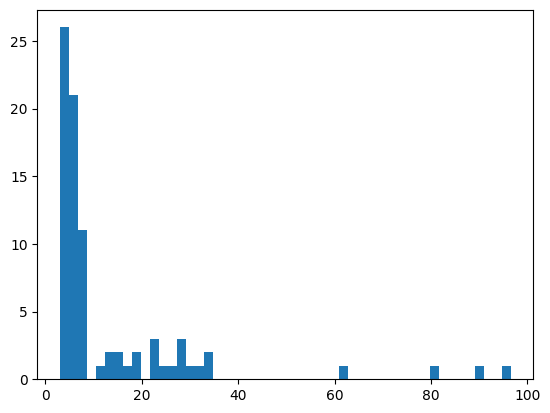

In [99]:
plt.hist((z_tbl2[z_tbl2.gene.isin(set(ACN2_nodes).intersection(UKBB2_nodes))].z_rxgscan),bins=50)
#plt.xlim([-5,5])
#plt.xscale('log')

In [56]:
z_tbl

,gene,z_rare,z_gscan,z_ukbb,z_rxgscan,z_rxukbb
0,TGFBR1,-1.273073,1.084720,0.280561,-1.380928,-0.357175
1,TGFBR2,-1.118975,0.925286,0.572886,-1.035371,-0.641045
2,SMAD3,0.590944,1.314052,1.386906,0.776531,0.819585
3,TGFB1,-1.845491,1.022557,0.621005,-1.887120,-1.146059
4,SMAD2,1.636550,1.648469,0.744632,2.697803,1.218628
...,...,...,...,...,...,...
19242,TRBV5-1,-0.367600,-0.847917,-0.064612,0.311694,0.023752
19243,TRBV19,-0.265244,-0.836868,-0.030437,0.221974,0.008073
19244,TRAV12-3,-0.265244,-0.827548,-0.030437,0.219502,0.008073
19245,TRAV22,-0.107916,-0.765957,-0.049732,0.082659,0.005367


In [85]:
inNetwork

,gene,z_rare,z_gscan,z_ukbb,z_rxgscan,z_rxukbb
0,SYT14,1.742143,8.654251,15.076940,9.969509,17.368308
1,KRTCAP3,2.660940,8.225281,21.886981,7.710925,20.518311
2,CCDC184,3.232399,2.235185,7.225011,2.388749,7.721391
3,SYT16,2.231721,5.511446,12.300007,4.647903,10.372821
4,ZNF524,2.534704,2.146866,5.441670,3.442812,8.726510
...,...,...,...,...,...,...
77,IPO7,2.670290,2.586265,6.906076,2.618018,6.990866
78,EIF3C,1.821378,3.291762,5.995543,19.420102,35.371349
79,ACACA,2.646035,1.934603,5.119028,1.934719,5.119333
80,GYS2,2.098930,2.611896,5.482188,1.827394,3.835573


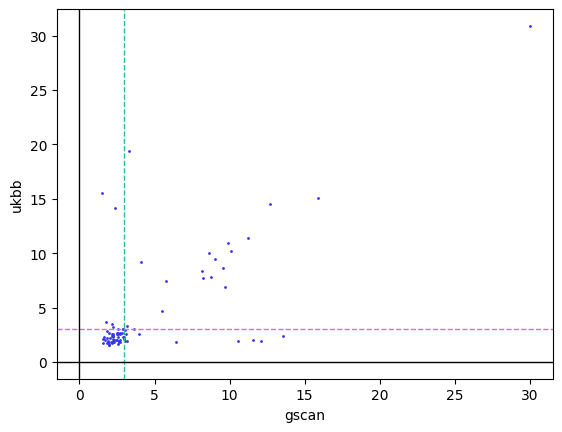

In [94]:
#plotting the zscores for the shared genes 2 networks

inNetwork=z_tbl[z_tbl.gene.isin(set(ACN2_nodes).intersection(UKBB2_nodes))]
outNetwork=z_tbl[~z_tbl.gene.isin(set(ACN2_nodes).intersection(UKBB2_nodes))]

plt.scatter(x=outNetwork['z_gscan'], y=outNetwork['z_ukbb'], s=1, color=color_dict['other'])
plt.scatter(x=inNetwork['z_gscan'], y=inNetwork['z_ukbb'], s=1, color=color_dict['shared'])
    
plt.xlabel('gscan')

plt.ylabel('ukbb')
plt.axvline(x = 3, color=color_dict['rare'], linestyle = 'dashed', linewidth=1)
plt.axhline(y = 3, color = color_dict['common'], linestyle = 'dashed', linewidth=1)
x_points = [(i+0.0001)/10 for i in range(-50,250)]
#combo_line = [comb_lim/x for x in x_points if x > comb_lim/50]
#plt.plot([x for x in x_points if x > comb_lim/40], combo_line, color=color_dict['shared'], linestyle='dashed',linewidth=1)
plt.axvline(x = 0, color='black', linestyle = 'solid', linewidth=1)
plt.axhline(y = 0, color = 'black', linestyle = 'solid', linewidth=1)

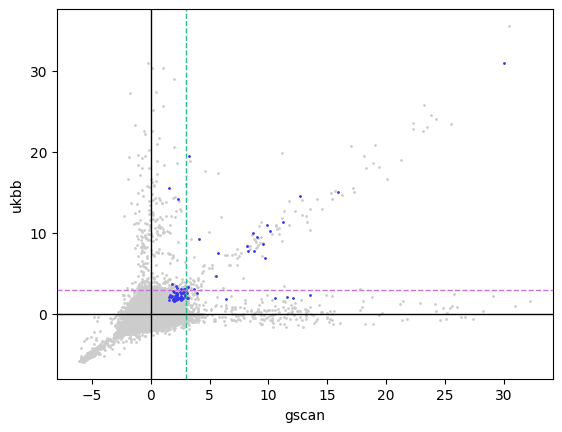

In [95]:
inNetwork=z_tbl2[z_tbl2.gene.isin(z_tbl.gene)]
outNetwork=z_tbl2[~z_tbl2.gene.isin(z_tbl.gene)]
plt.scatter(x=outNetwork['z_gscan'], y=outNetwork['z_ukbb'], s=1, color=color_dict['other'])
plt.scatter(x=inNetwork['z_gscan'], y=inNetwork['z_ukbb'], s=1, color=color_dict['shared'])
    
plt.xlabel('gscan')

plt.ylabel('ukbb')
plt.axvline(x = 3, color=color_dict['rare'], linestyle = 'dashed', linewidth=1)
plt.axhline(y = 3, color = color_dict['common'], linestyle = 'dashed', linewidth=1)
x_points = [(i+0.0001)/10 for i in range(-50,250)]
#combo_line = [comb_lim/x for x in x_points if x > comb_lim/50]
#plt.plot([x for x in x_points if x > comb_lim/40], combo_line, color=color_dict['shared'], linestyle='dashed',linewidth=1)
plt.axvline(x = 0, color='black', linestyle = 'solid', linewidth=1)
plt.axhline(y = 0, color = 'black', linestyle = 'solid', linewidth=1)

In [78]:
z_tbl3=z_tbl2[(z_tbl2.gene.isin(ACN2_nodes))|(z_tbl2.gene.isin(UKBB2_nodes))]

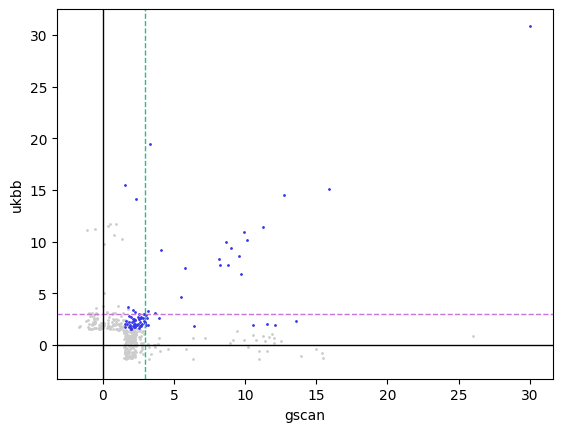

In [96]:
inNetwork=z_tbl3[z_tbl3.gene.isin(z_tbl.gene)]
outNetwork=z_tbl3[~z_tbl3.gene.isin(z_tbl.gene)]
plt.scatter(x=outNetwork['z_gscan'], y=outNetwork['z_ukbb'], s=1,color=color_dict['other'])
plt.scatter(x=inNetwork['z_gscan'], y=inNetwork['z_ukbb'], s=1, color=color_dict['shared'])
    
plt.xlabel('gscan')

plt.ylabel('ukbb')
plt.axvline(x = 3, color=color_dict['rare'], linestyle = 'dashed', linewidth=1)
plt.axhline(y = 3, color = color_dict['common'], linestyle = 'dashed', linewidth=1)
x_points = [(i+0.0001)/10 for i in range(-50,250)]
#combo_line = [comb_lim/x for x in x_points if x > comb_lim/50]
#plt.plot([x for x in x_points if x > comb_lim/40], combo_line, color=color_dict['shared'], linestyle='dashed',linewidth=1)
#plt.xlim([0,60])
#plt.ylim([0,110])
plt.axvline(x = 0, color='black', linestyle = 'solid', linewidth=1)
plt.axhline(y = 0, color = 'black', linestyle = 'solid', linewidth=1)

In [91]:
z_tbl.describe()

,z_rare,z_gscan,z_rxgscan,z_ukbb,z_rxukbb
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2.737999,4.498265,13.312065,4.474097,11.716893
std,1.707094,4.450725,18.075775,4.884322,13.539145
min,1.504171,1.530094,3.038902,1.551827,3.038836
25%,1.849413,2.186862,4.458851,1.964804,4.351926
50%,2.129714,2.605187,5.917190,2.473427,5.515546
75%,2.778889,4.039275,14.863901,3.407190,15.351046
max,9.141610,30.039748,96.560928,30.890303,84.716446


In [ ]:
z_tbl2.gene

In [93]:
z_tbl2[z_tbl2.gene.isin(z_tbl.gene)].describe()

,z_rare,z_gscan,z_ukbb,z_rxgscan,z_rxukbb
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2.737999,4.498265,4.474097,13.312065,11.716893
std,1.707094,4.450725,4.884322,18.075775,13.539145
min,1.504171,1.530094,1.551827,3.038902,3.038836
25%,1.849413,2.186862,1.964804,4.458851,4.351926
50%,2.129714,2.605187,2.473427,5.917190,5.515546
75%,2.778889,4.039275,3.407190,14.863901,15.351046
max,9.141610,30.039748,30.890303,96.560928,84.716446


In [77]:
UKBB2_nodes==ACN2_nodes

False